In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline

In [109]:
error=0.0006
lower=485
upper=1200
Num=430
num=430
Frame=230
tt='reflect'
cmapt='hot'
plt.style.use('classic')
val=2
typ='cubic'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[albnum,alanum,alanum,alanum,alanum,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.296]
for x in xzs:
    yt=[]
    ytn=[]
    
    for k in ['AL-B','AL-A','AL-C','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B','SiC-C']:
            T={}
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    yns.append(np.nan)
                    pass
            T['{}'.format]=yns
            TT=DataFrame(T)
            TTT=TT.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
            Yns=TTT.values
            yt.append(ys)
            ytn.append(Yns)
            #ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
df2.drop([2,8],axis=1,inplace=True)
#df3=dff3.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
#df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

In [110]:
df2.iloc[0][0]

array([[0.01210549],
       [0.01026714],
       [0.00842879],
       [0.00355326],
       [0.00113551],
       [0.0063433 ],
       [0.01485513],
       [0.0165757 ],
       [0.01793571],
       [0.01076663],
       [0.001739  ],
       [0.00100568],
       [0.00693512],
       [0.01614707],
       [0.01472982]])

In [111]:
a,b=df2.shape
for row in range(0,a):
    co=0
    y=df2.iloc[row].values
    '''fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)'''
    for value in y:
        V=[]
        for j in value:
            V.append(j[0])
        mean=np.full(val,1/val)
        #fig= plt.figure(figsize=(12,10))
        #axes=fig.add_subplot(1,1,1)
        pos=numbers
        #display(V,len(numbers))
        #interp1d(x, y, kind='cubic')
        f = interp1d(numbers,V,kind=typ)
        #f = interpolate.interp1d(pos, value)
        #f=interpolate.Akima1DInterpolator(pos,value)
        #f=interpolate.CubicSpline(pos,value)
        #f=interpolate.BSpline(pos,value,1)
        #f=interpolate.make_interp_spline(pos,value)
        xnew=np.linspace(0,3100,num)
        '''plt.scatter(numbers,value),plt.plot(xnew,convolve(f(xnew),mean,mode=tt))
        plt.legend(['Interplotation','DataPlot'])
        plt.title('Line_{}_{}_Smooth{}'.format(stelement[z],xzs[row],val))
        plt.savefig('Line_{}_{}_S{}.png'.format(stelement[z],xzs[row],val))'''
        #display(xzs[row],stelement[z])
        nosiy=convolve(f(xnew),mean,mode=tt)
        whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=value
        whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=nosiy
        z+=1
        if z==len(stelement):
            z=0

                #print('Nan')
#finaldf =pd.DataFrame.from_dict(whole, orient='index')
#display(finaldf,whole)
finaldf1 =pd.DataFrame.from_dict(whole1, orient='index')
#finaldf1.to_csv('First.csv')
finaldf2=DataFrame(whole2)
#finaldf1.to_csv('S{}.csv'.format(val))

In [112]:
finaldf1

,0,1,2,3,4,5,6,7,8,9,...,420,421,422,423,424,425,426,427,428,429
EEL=0.296_line_AlB,0.012017,0.011846,0.011682,0.011525,0.011376,0.011234,0.011099,0.010969,0.010846,0.010727,...,0.014384,0.015536,0.016495,0.017211,0.017637,0.017723,0.017423,0.016687,0.015467,0.014730
EEL=0.296_line_AlA,0.012112,0.011789,0.011484,0.011196,0.010924,0.010668,0.010427,0.010201,0.009988,0.009789,...,0.017478,0.016941,0.016397,0.015859,0.015335,0.014838,0.014377,0.013963,0.013608,0.013446
EEL=0.296_line_SiO2A,0.012156,0.012102,0.012041,0.011973,0.011897,0.011815,0.011726,0.011631,0.011531,0.011425,...,0.017669,0.017241,0.016808,0.016378,0.015963,0.015571,0.015212,0.014896,0.014634,0.014517
EEL=0.296_line_SiO2B,0.010122,0.010107,0.010089,0.010068,0.010045,0.010019,0.009991,0.009960,0.009926,0.009890,...,0.015754,0.015485,0.015211,0.014941,0.014679,0.014434,0.014210,0.014016,0.013856,0.013786
EEL=0.296_line_SiO2C,0.009638,0.009501,0.009370,0.009243,0.009120,0.009001,0.008887,0.008777,0.008670,0.008567,...,0.015472,0.015099,0.014722,0.014348,0.013985,0.013642,0.013326,0.013046,0.012810,0.012704
EEL=0.296_line_SiCA,0.006045,0.005931,0.005819,0.005709,0.005599,0.005491,0.005384,0.005278,0.005173,0.005070,...,0.009087,0.009135,0.009181,0.009228,0.009277,0.009329,0.009386,0.009448,0.009517,0.009553
EEL=0.296_line_SiCB,0.005213,0.005146,0.005083,0.005023,0.004966,0.004913,0.004862,0.004814,0.004768,0.004725,...,0.007394,0.008076,0.008635,0.009040,0.009259,0.009262,0.009018,0.008495,0.007664,0.007167


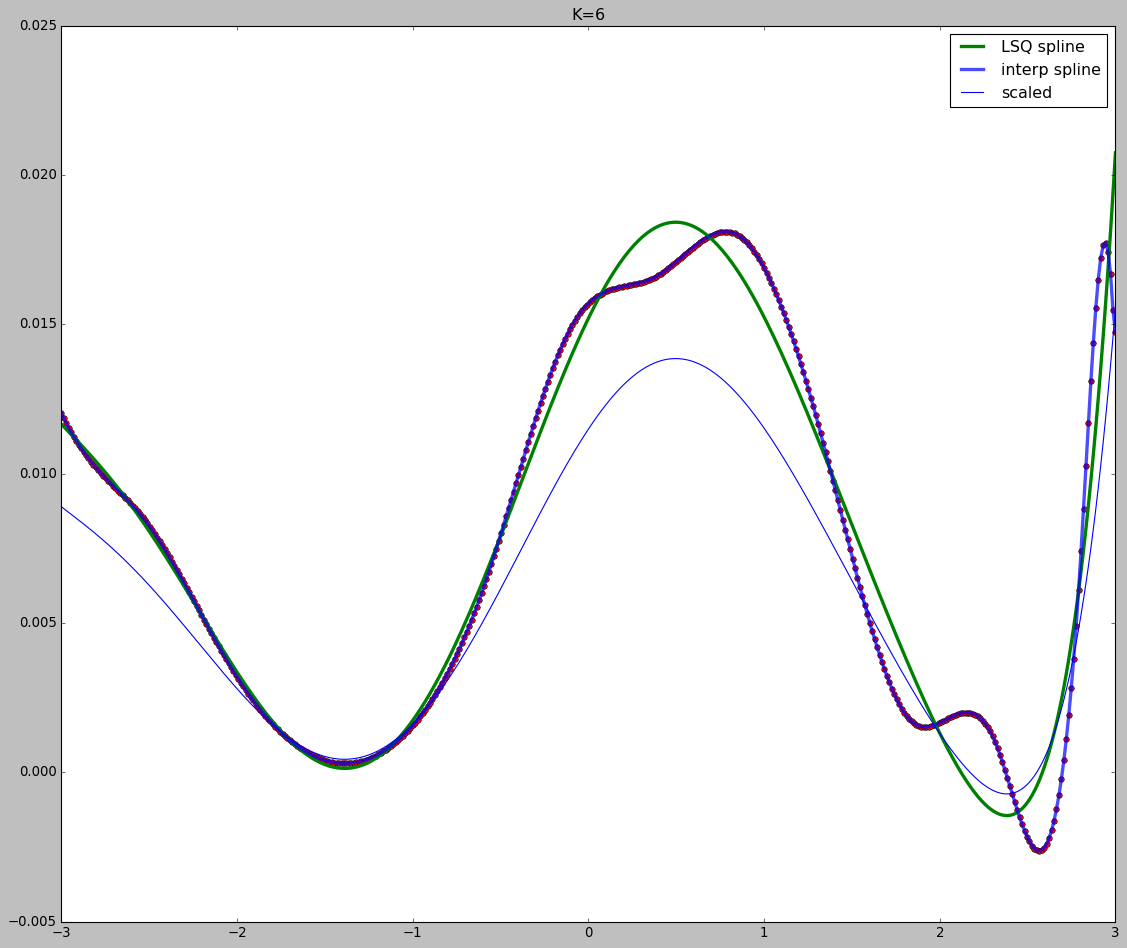

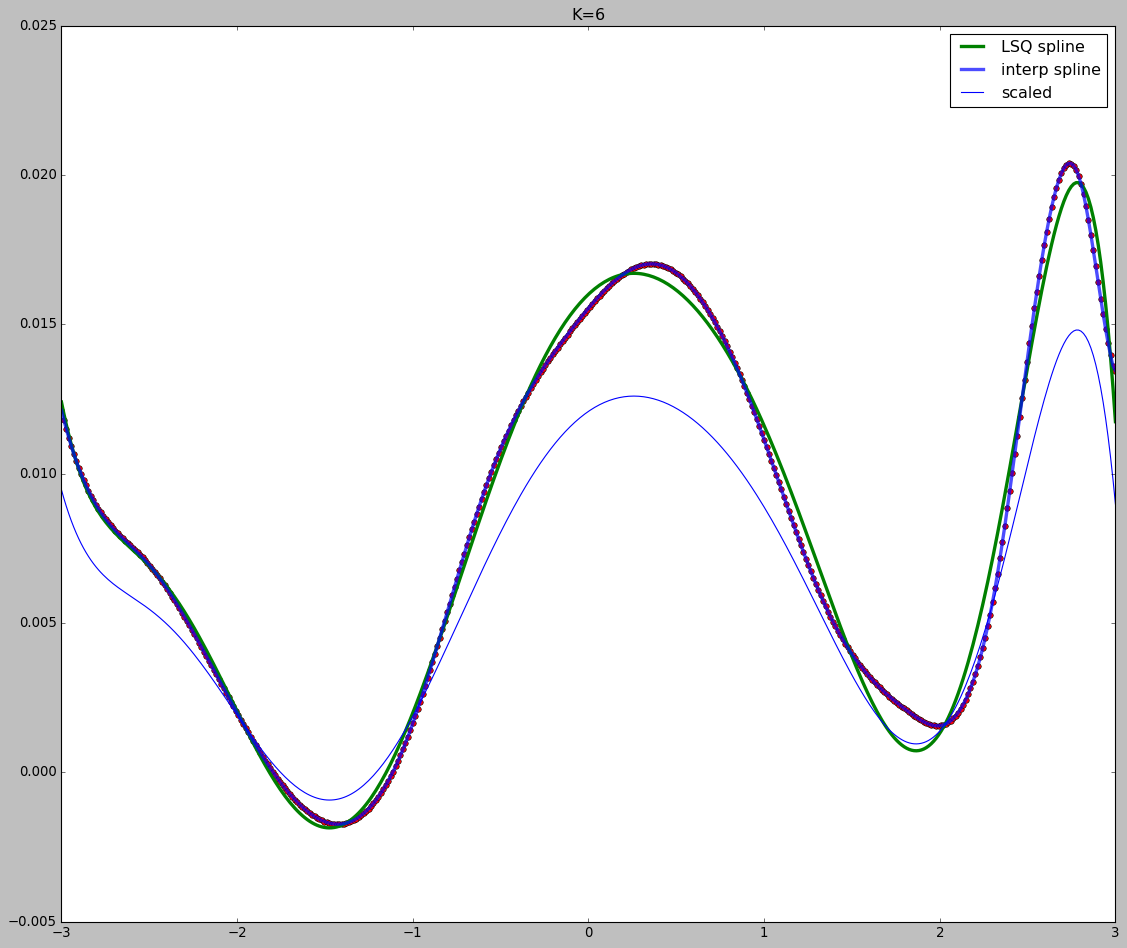

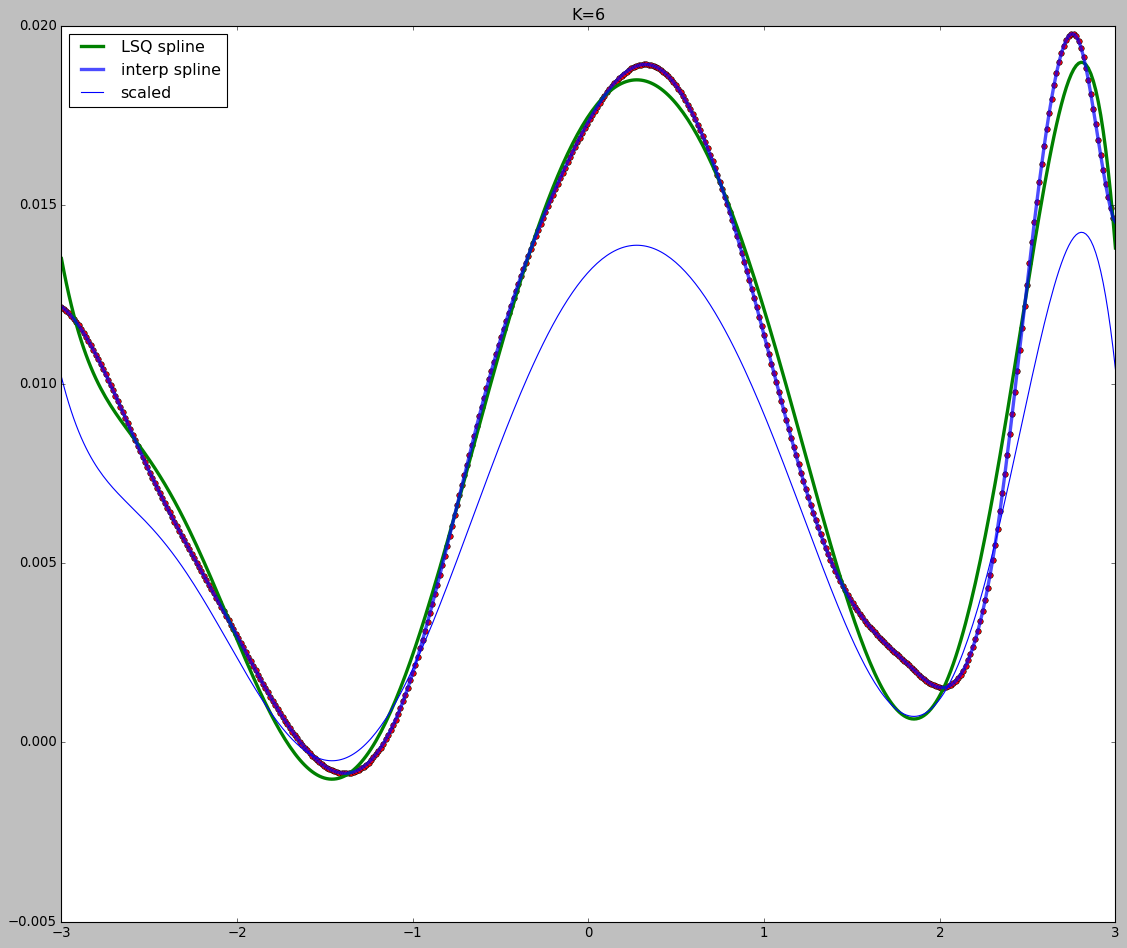

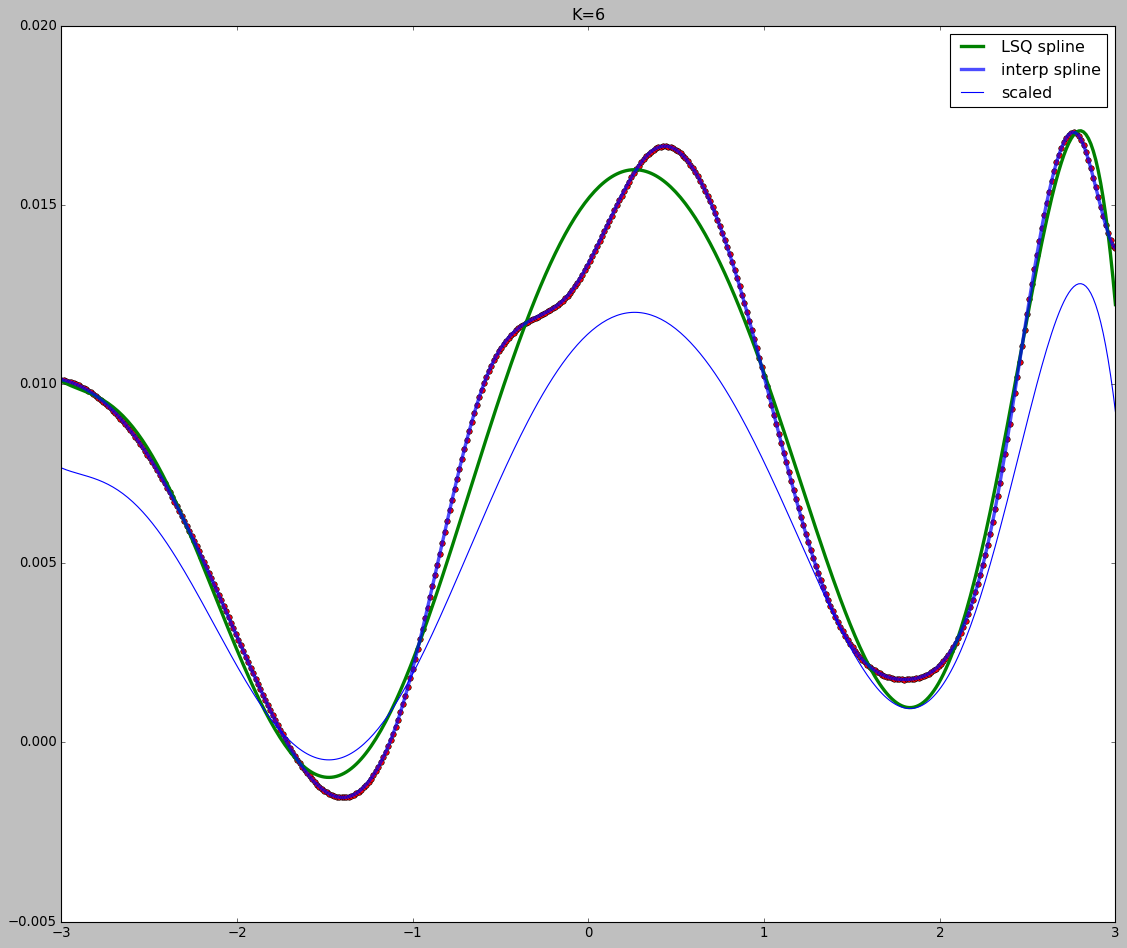

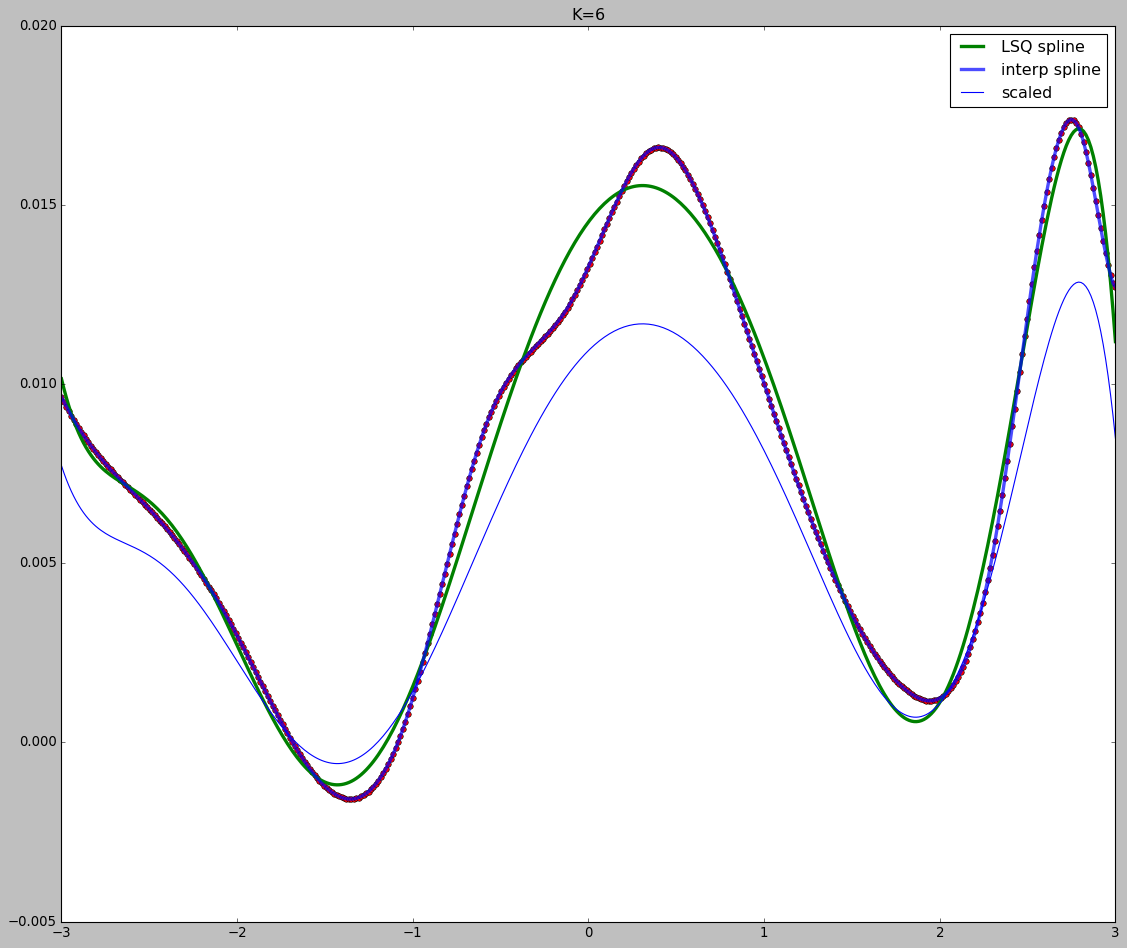

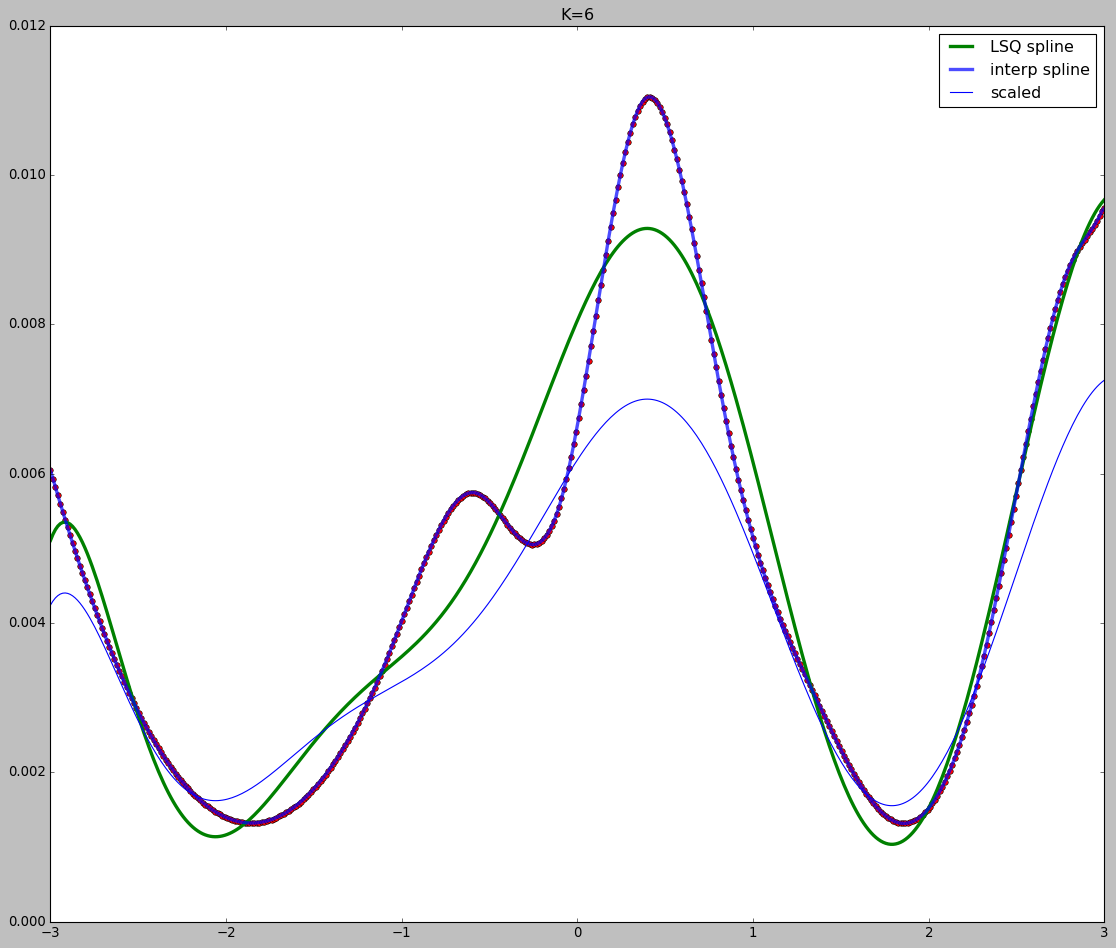

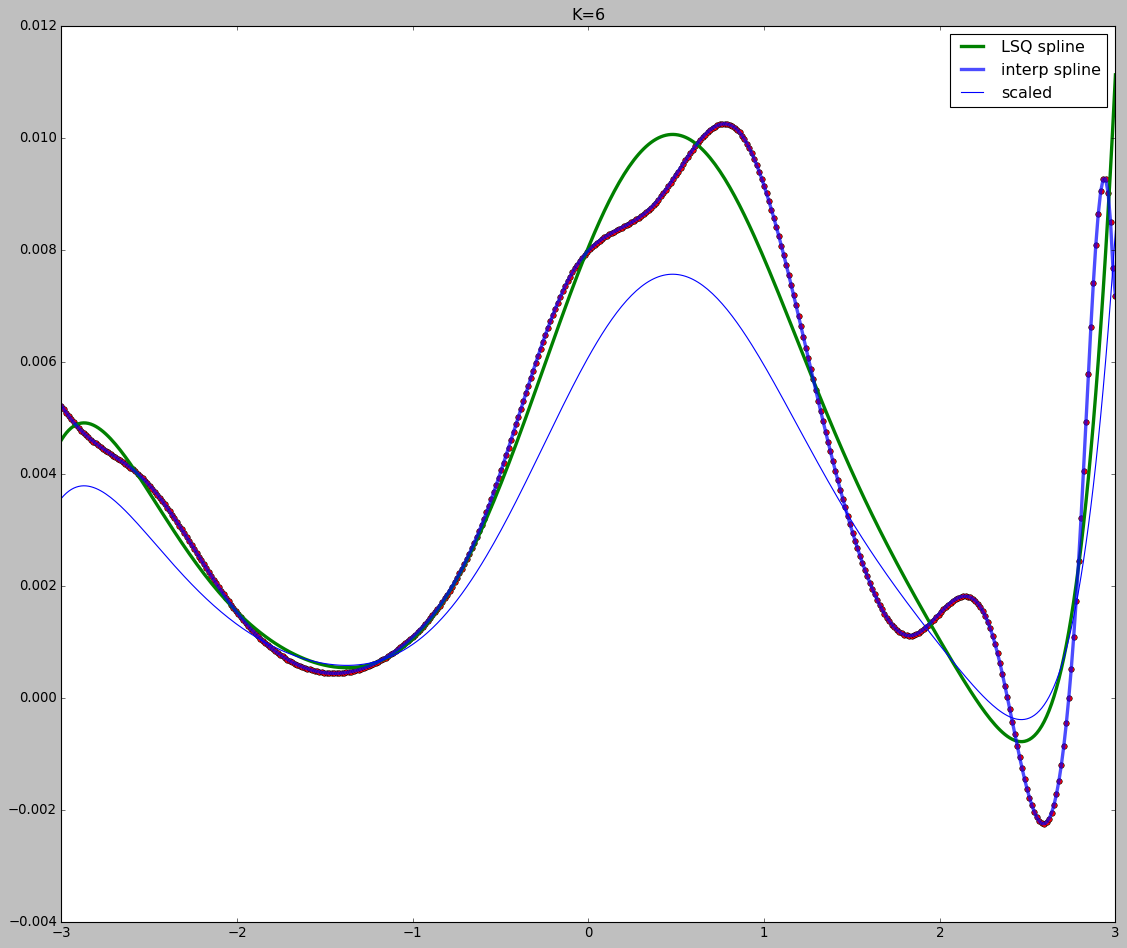

In [136]:
a,b=finaldf1.shape
#display(a,b)
FF={}
for i in range(1,a+1):
    V=df3
    newa=[]
    fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)
    y=finaldf1.iloc[i-1:i].values[0]
    X = np.linspace(-3,3, len(y))
    from scipy.interpolate import make_lsq_spline, BSpline
    t = [-1, 0, 1]
    k = 6
    t = np.r_[(X[0],)*(k+1),t,(X[-1],)*(k+1)]
    spl = make_lsq_spline(X, y, t, k)
    from scipy.interpolate import make_interp_spline
    spl_i = make_interp_spline(X, y)
    xs = np.linspace(-3, 3, num)
    Xsca=spl(xs)
    xsca=Xsca.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler((min(xsca)+abs(min(xsca)*0.5),max(xsca)*0.75))
    x_scaled = min_max_scaler.fit_transform(xsca)
    import matplotlib.pyplot as plt
    plt.plot(X, y, 'ro', ms=5)
    plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
    plt.plot(xs, spl_i(xs), 'b-', lw=3, alpha=0.7, label='interp spline')
    plt.plot(xs,x_scaled,label='scaled')
    plt.legend(loc='best')
    #display(spl(xs))
    FF['L_{}'.format(i)]=x_scaled.flatten()
    #display(len(spl(xs)))
    #plt.show()
    plt.title('K={}'.format(k))
    #plt.savefig('W{}.png'.format(i))
Finaldf1=DataFrame(FF).transpose()
#display(Finaldf1)

In [114]:
Finaldf1

,0,1,2,3,4,5,6,7,8,9,...,420,421,422,423,424,425,426,427,428,429
L_1,0.009784,0.009710,0.009635,0.009561,0.009487,0.009412,0.009337,0.009261,0.009186,0.009109,...,0.008909,0.009698,0.010528,0.011401,0.012319,0.013282,0.014293,0.015353,0.016463,0.017627
L_2,0.010409,0.010066,0.009747,0.009451,0.009177,0.008923,0.008688,0.008471,0.008270,0.008085,...,0.015763,0.015397,0.014968,0.014469,0.013900,0.013254,0.012529,0.011721,0.010826,0.009838
L_3,0.011417,0.011109,0.010822,0.010553,0.010302,0.010068,0.009849,0.009645,0.009454,0.009276,...,0.015678,0.015456,0.015186,0.014863,0.014485,0.014049,0.013553,0.012993,0.012367,0.011671
L_4,0.008495,0.008462,0.008432,0.008404,0.008378,0.008354,0.008330,0.008307,0.008284,0.008261,...,0.014017,0.013803,0.013547,0.013244,0.012893,0.012492,0.012037,0.011527,0.010959,0.010330
L_5,0.008532,0.008295,0.008078,0.007878,0.007694,0.007526,0.007373,0.007232,0.007104,0.006987,...,0.013891,0.013626,0.013310,0.012940,0.012513,0.012027,0.011479,0.010865,0.010182,0.009427
L_6,0.004448,0.004515,0.004567,0.004606,0.004633,0.004647,0.004651,0.004644,0.004628,0.004603,...,0.007771,0.007838,0.007901,0.007959,0.008014,0.008064,0.008109,0.008150,0.008187,0.008218
L_7,0.003826,0.003883,0.003933,0.003975,0.004010,0.004038,0.004059,0.004074,0.004083,0.004087,...,0.004085,0.004547,0.005039,0.005563,0.006120,0.006711,0.007339,0.008003,0.008707,0.009452


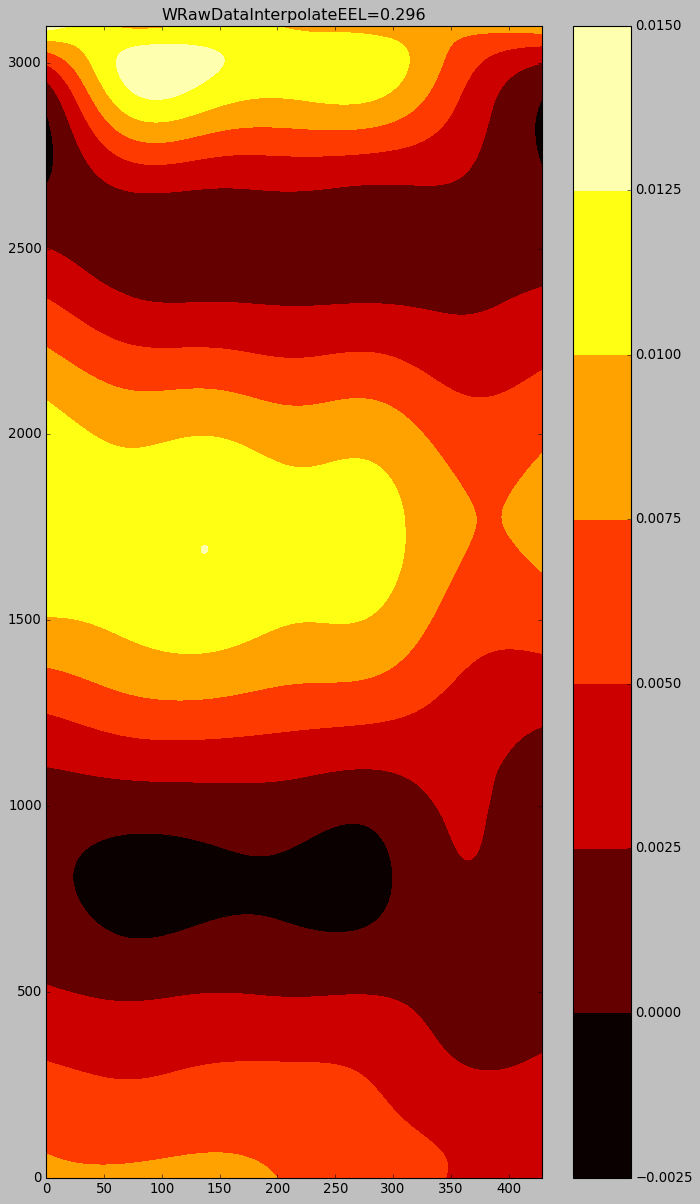

In [139]:
Pos=np.linspace(0,7,7)
R,C=Finaldf1.shape
angle=127
for j in range(1,round(R/7)+1):
    subnew1={}
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for i in range(1,C+1):
        qq=Finaldf1.iloc[(j-1)*7:j*7,i-1:i].values
        F = Rbf(Pos,qq,kind=typ)
        xnew=np.linspace(0,7,Num)
        XX=F(xnew).reshape(-1,1)
        min_max_scaler = preprocessing.MinMaxScaler((min(XX)+abs(min(XX)*0.15),max(XX)*0.9))
        X_scaled = min_max_scaler.fit_transform(XX)
        subnew1['{}'.format(i)]=X_scaled.flatten()
        '''plt.plot(X_scaled)
        plt.plot(F(xnew))'''
    dff=DataFrame(subnew1)
    dff.to_csv('r_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
    dy=np.linspace(0,3100,Num)
    fig= plt.figure(figsize=(10,18))
    yy=dff.index
    img=plt.contourf(yy,dy,dff.transpose().values,cmap='hot')
    plt.title('WRawDataInterpolateEEL={}'.format(xzs[j-1]))
    plt.colorbar()
    norm = colors.Normalize(vmin=-0.0009, vmax=0.015)
    img.set_norm(norm)
    plt.savefig('KInter_{}.png'.format(j),bbox_inches='tight')

In [138]:
k=[]
l=[]
for i in range (1,dff.shape[0]+1):
    z=dff.iloc[i-1:i].values[0]
    k.append(max(z))
    l.append(min(z))
display(max(k),min(l))

0.014175969871361329

-0.0008405546596007434

In [44]:
p=Finaldf1.iloc[0:1].values[0]

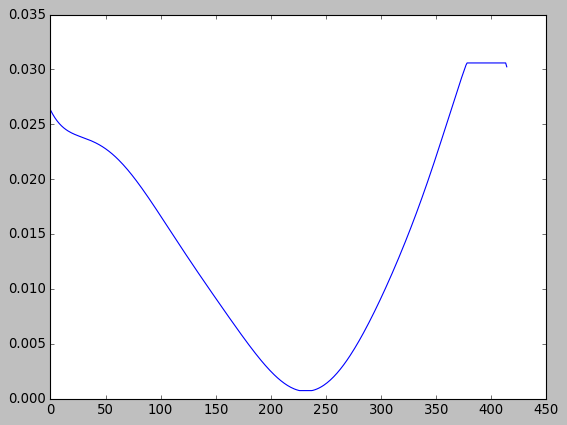

In [69]:
mi=min(p)*1.1
ma=max(p)*0.9
me=(mi+ma)/2
smooth=np.clip(p,mi,ma)
smooth=np.interp(p, (mi, ma), (mi, ma))
plt.plot(smooth)
#plt.plot(p)

0.03398782041095222

array([0.02787001])

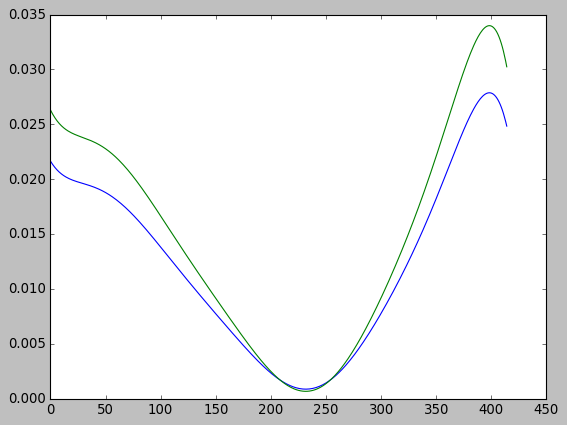

In [86]:
import pandas as pd
from sklearn import preprocessing
mi=min(p)*1.3
ma=max(p)*0.82
min_max_scaler = preprocessing.MinMaxScaler((mi,ma))
p1=p.reshape(-1, 1)
x_scaled = min_max_scaler.fit_transform(p1)
display(max(p),max(x_scaled))
plt.plot(x_scaled)
plt.plot(p)

In [62]:
np.convolve([1,2,3,4,5],[0.5,1,1.5])

array([ 4. , 12. , 24. , 24.5, 25.5, 27. , 22.5, 13.5])